<a href="https://colab.research.google.com/github/mardom/astrostatistics-2020/blob/main/TimeDomain1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://scitldr.apps.allenai.org/

https://antares.noirlab.edu/

http://alerce.science/

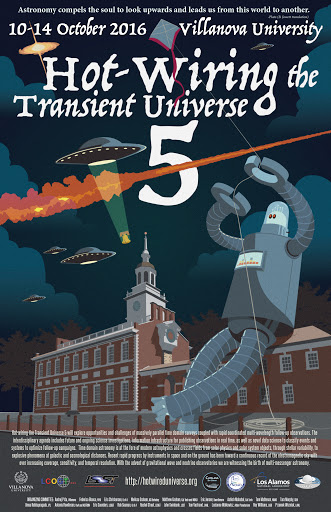

# Time Series Analysis

Within time-domain data, measurement errors can range from as small as one
part in 100,000 (e.g., the photometry from the Kepler mission), to potential events buried in noise with a signal-to-noise ratio per data point of, at best, a few
(e.g., searches for gravitational waves using the Laser Interferometric Gravitational
Observatory (LIGO) data). Data sets can include many billions of data points, and sample sizes can be in the millions (e.g., the LINEAR data set with 20 million light curves, each with a few hundred measurements). Upcoming surveys, such as Gaia and LSST, will increase existing data sets by large factors; the Gaia satellite will measure about a billion sources about 70 times during its five-year mission, and the
ground-based LSST will obtain about 800 measurements each for about 20 billion sources over its ten years of operation. Scientific utilization of such data sets will include searches for extrasolar planets; tests of stellar astrophysics through studies of variable stars and supernova explosions; distance determination (e.g., using standard
candles such as Cepheids, RR Lyrae, and supernovas); and fundamental physics such as tests of general relativity with radio pulsars, cosmological studies with supernovas
and searches for gravitational wave events.

## Main Concepts for Time Series Analysis
The time series discussed here will be limited to two-dimensional scalar data sets: pairs of random variables, $(t_1 , y_1 ), . . . , (t_N , y_N)$, with no assumptions about the sampling of the time coordinate t. In many ways, the analysis methods discussed here are closely related to the parameter estimation and model selection problems discussed in the con-
text of regression; when the temporal variable t is replaced by x,
this connection becomes more obvious. Nevertheless, there are some important differences encountered in time series analysis, such as models that have a sense
of the directionality of time in them. Unlike regression
problems where different y measurements are typically treated as independent random variables, in such models the value of $y_{i +1}$ directly depends on the preceding
value $y_i$.

The main tasks of time series analysis are:
- (1) to characterize the presumed
temporal correlation between different values of y, including its significance, and 
- (2) to forecast (predict) future values of y. In many astronomical cases, the characterization of the underlying physical processes that produced the data, which is typically
addressed by learning parameters for a model, is the key goal. For example, analysis of a light curve can readily differentiate between pulsating and eclipsing variable stars.

Good examples of the second task are the solar activity forecasting, or prediction of the time and place of a potential asteroid impact on Earth.

### Is My time Series Just Noise?
Given a time series, we often first want to determine whether we have detected variability, irrespective of the details of the underlying process. This is equivalent to
asking whether the data are consistent with the null hypothesis described by a model consisting of a constant signal plus measurement noise.

From the viewpoint of classical (frequentist) statistics, this question can be treated as a case of hypothesis testing: What is the probability that we would obtain
our data by chance if the null hypothesis of no variability were correct? If the errors are known and Gaussian, we can simply compute $\chi^2$ and the corresponding p values.

This improvement in ability to detect a signal using a model is not limited
to periodic variability—this is a general feature of model fitting (sometimes called
“matched filter” extraction). Within the Bayesian framework, we cannot even begin
our analysis without specifying an alternative model to the constant signal model.
If underlying variability is not periodic, it can be roughly divided into two other
families: stochastic variability, where variability is always there but the changes are
not predictable for an indefinite period (e.g., quasar variability), and temporally
localized events such as bursts (e.g., flares from stars, supernova explosions, gamma-
ray bursts, or gravitational wave events). The various tools and methods to perform
such time series analysis are discussed in the next section.

## Modeling Toolkit for Time Series Analysis
The main tools for time series analysis belong to either the time domain or the frequency domain. Many of the tools and methods discussed in earlier chapters play a prominent role in the analysis of time series data. In this section, we first
revisit methods introduced earlier (mostly applicable to the time-domain analysis) and discuss parameter estimation, model selection, and classification in the context of time series analysis. We then extend this toolkit by introducing tools for analysis in
the frequency domain, such as Fourier analysis, discrete Fourier transform, wavelet analysis, and digital filtering.

### Parameter Estimation, Model Selection, and Classification for Time
Series Data Detection of a signal, whatever it may be, is essentially a hypothesis testing or model
selection problem. The quantitative description of a signal belongs to parameter estimation and regression problems. Once such a description is available for a set of time series data (e.g., astronomical sources from families with distinctive light
curves), their classification utilizes essentially the same methods as discussed in the
preceding chapter.

In general, we will fit a model to a set of N data points $(t_j , y_j ), j = 1, . . . , N$ with known errors for y.

$$y_j(t_j)=\sum_{m=1}^{M} \beta_m T_m(t_j|\theta_m)+\epsilon_j$$

where the functions $T_m (t|\theta_m )$ need not be periodic, nor do the times $t_j$ need to be
evenly sampled. As before, the vector $\theta_m$ contains model parameters that describe
each $T_m (t)$ (here we use the symbol | to mean “given parameters $\theta_m$” and not in
the sense of a conditional pdf).

 Common deterministic models for the underlying process that generates data include $T (t) = sin(\omega t)$ and $T (t) = exp(−\alpha t)$, where
the frequency $\omega$ and decay rate $\alpha$ are model parameters to be estimated from data.
Another important model is the so-called “chirp signal,” $T (t) = sin(\phi +\omega t +\alpha t^2)$. In
eq. $\epsilon$ stands for noise, which is typically described by heteroscedastic Gaussian
errors with zero mean and parametrized by known $\sigma_j$.

 Note that in this chapter, we have changed the index for data values from i to j because we will frequently encounter the imaginary unit i = −1. Finding whether data favor such a model over the simplest possibility of no variability ($y(t)=constant+noise$) is no different from model selection problems
discussed earlier, and can be addressed via the Bayesian model odds ratio, or approximately using AIC and BIC criteria.

Given a quantitative description
of time series y(t), the best-fit estimates of model parameters $\theta_m$ can then be used as
attributes for various supervised and unsupervised classification methods (possibly with additional attributes that are not extracted from the analyzed time series).

### Fourier Analysis
Fourier analysis plays a major role in the analysis of time series data. In Fourier analysis, general functions are represented or approximated by integrals or sums
of simpler trigonometric functions. As first shown in 1822 by Fourier himself in his analysis of heat transfer, this representation often greatly simplifies analysis.

Figure illustrates how an RR Lyrae light curve can be approximated by a sum of sinusoids. The more terms that are included in he sum, the better is the resulting approximation. For periodic functions, such as periodic light curves in astronomy, it is often true that a relatively small number of terms (less than 10) suffices to reach an approximation precision level similar to the measurement precision.



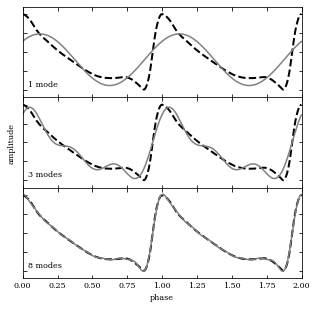

In [14]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_rrlyrae_templates

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Load the RR Lyrae template
templates = fetch_rrlyrae_templates()
x, y = templates['115r'].T

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0)

kvals = [1, 3, 8]
subplots = [311, 312, 313]

for (k, subplot) in zip(kvals, subplots):
    ax = fig.add_subplot(subplot)

    # Use FFT to fit a truncated Fourier series
    y_fft = np.fft.fft(y)
    y_fft[k + 1:-k] = 0
    y_fit = np.fft.ifft(y_fft).real

    # plot the true value and the k-term reconstruction
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y, y]), '--k', lw=2)
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y_fit, y_fit]), color='gray')

    label = "%i mode" % k
    if k > 1:
        label += 's'

    ax.text(0.02, 0.1, label, ha='left', va='bottom',
            transform=ax.transAxes)

    if subplot == subplots[-1]:
        ax.set_xlabel('phase')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    if subplot == subplots[1]:
        ax.set_ylabel('amplitude')
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(0, 2)
    ax.set_ylim(1.1, -0.1)

plt.show()

The most useful applications of Fourier analysis include convolution and deconvolution, filtering, correlation and autocorrelation, and power spectrum estimation. The use of these
methods is by no means limited to time series data; for example, they are often used
to analyze spectral data or in characterizing the distributions of points. When the
data are evenly sampled and the signal-to-noise ratio is high, Fourier analysis can be
a powerful tool. When the noise is high compared to the signal, or the signal has a
complex shape (i.e., it is not a simple harmonic function), a probabilistic treatment
(e.g., Bayesian analysis) offers substantial improvements, and for irregularly (un-
evenly) sampled data probabilistic treatment becomes essential. For these reasons,
in the analysis of astronomical time series, which are often irregularly sampled with
heteroscedastic errors, Fourier analysis is often replaced by other methods (such
as the periodogram analysis discussed later).

Numerous books about Fourier analysis are readily available. An excellent concise summary of the elementary properties of the Fourier transform is available in
NumRec. Here, we
will briefly summarize the main features of Fourier analysis and limit our discussion
to the concepts used in the rest of this chapter.
The Fourier transform of function $h(t)$ is defined as

$$H(f)=\int_{-\infty}^{\infty} h(t) exp(-i 2 \pi f t) dt$$

with inverse transformation

$$h(t)=\int_{-\infty}^{\infty} H(f) exp(i 2 \pi f t) df$$

where t is time and f is frequency (for time in seconds, the unit for frequency is hertz, or Hz; the units for H(f) are the product of the units for h(t) and inverse
hertz). We note that NumRec and most physics textbooks define the
argument of the exponential function in the inverse transform with the minus sign; the above definitions are consistent with SciPy convention and most engineering literature. Another notational detail is that angular frequency, $\omega = 2\pi f$ , is often used instead of frequency (the unit for $\omega$ is radians per second) and the extra factor of $2\pi$ due to the change of variables is absorbed into either $h(t)$ or $H( f )$, depending on convention.

For a real function h(t), H(f) is in general a complex function. In the special
case when h(t) is an even function such that $h(−t) = h(t)$, H(f) is real and even as
well. For example, the Fourier transform of a pdf of a zero-mean Gaussian $N (0, \sigma )$
in the time domain is a Gaussian $H( f ) = exp(−2 \pi^2 \sigma^2 f^2 )$ in the frequency domain. When the time axis of an arbitrary function h(t) is shifted by $\Delta t$, then the Fourier transform of $h(t + \Delta t)$ is

$$\int_{-\infty}^{\infty} h(t+\Delta t) exp(-i 2 \pi f t) dt = H( f ) exp(i 2\pi f t)$$

Therefore, the Fourier transform of a Gaussian $N (\mu, \sigma)$ is

$$H_{Gauss} ( f ) = exp(−2 \pi^2 \sigma^2 f^2 ) [cos(2\pi f \mu) + i sin(2\pi f \mu)]$$

An important quantity in time series analysis is the one-sided power spectral density (PSD) function (or power spectrum) defined for $0 ≤ f < \infty$ as:

$$PSD( f ) ≡ |H( f )|^2 + |H(−f )|^2 .$$

The PSD gives the amount of power contained in the frequency interval between f and f + d f (i.e., the PSD is a quantitative statement about the “importance” of each frequency mode). For example, when h(t) = sin(2π t/T ), P ( f ) is a $\delta$ function centered on f = 1/T .
The total power is the same whether computed in the frequency or the time
domain:

$$P_{tot}=\int_{0}^{\infty} PSD( f ) d f=\int_{-\infty}^{\infty} |h(t)|^2 dt$$

This result is known as Parseval’s theorem. Another important result is the convolution theorem: A convolution of two functions
a(t) and b(t) is given by:


$$(a \star b)(t)=\int_{-\infty}^{\infty} a(t')b(t − t') dt' .$$


Convolution is an unavoidable result of the measurement process because the measurement resolution, whether in time, spectral, spatial, or any other domain, is never infinite. For example, in astronomical imaging the true intensity distribution
on the sky is convolved with the atmospheric seeing for ground-based imaging, or the telescope diffraction pattern for space-based imaging (radio astronomers use the
term “beam convolution”). In the above equation, the function a can be thought of as the “convolving pattern” of the measuring apparatus, and the function b is the signal.

In practice, we measure the convolved (or smoothed) version of our signal, $a \star b(t)$,
and seek to uncover the original signal b using the presumably known a. The convolution theorem states that if $h = a \star b$, then the Fourier transforms of h, a, and b are related by their pointwise products:

$$H( f ) = A( f )B( f )$$

Thus a convolution of two functions is transformed into a simple multiplication of the associated Fourier representations. Therefore, to obtain b, we can simply take
the inverse Fourier transform of the ratio $H( f )/A( f )$. In the absence of noise, this operation is exact. The convolution theorem is a very practical result; we shall
consider further examples of its usefulness below.

A schematic representation of the convolution theorem is shown in next figure. Note that we could have started from the convolved function shown in the bottom-left panel and uncovered the underlying signal shown in the top-left panel. When
noise is present we can, however, never fully recover all the detail in the signal shape.



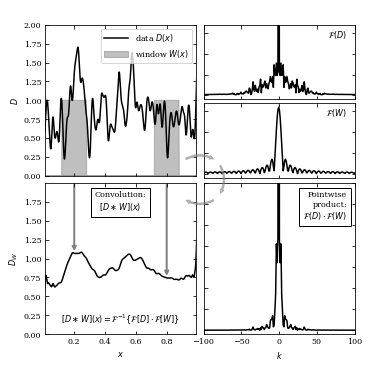

In [15]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from scipy.signal import fftconvolve

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate random x, y with a given covariance length
np.random.seed(1)
x = np.linspace(0, 1, 500)
h = 0.01
C = np.exp(-0.5 * (x - x[:, None]) ** 2 / h ** 2)
y = 0.8 + 0.3 * np.random.multivariate_normal(np.zeros(len(x)), C)

#------------------------------------------------------------
# Define a normalized top-hat window function
w = np.zeros_like(x)
w[(x > 0.12) & (x < 0.28)] = 1

#------------------------------------------------------------
# Perform the convolution
y_norm = np.convolve(np.ones_like(y), w, mode='full')
valid_indices = (y_norm != 0)
y_norm = y_norm[valid_indices]

y_w = np.convolve(y, w, mode='full')[valid_indices] / y_norm

# trick: convolve with x-coordinate to find the center of the window at
#        each point.
x_w = np.convolve(x, w, mode='full')[valid_indices] / y_norm

#------------------------------------------------------------
# Compute the Fourier transforms of the signal and window
y_fft = np.fft.fft(y)
w_fft = np.fft.fft(w)

yw_fft = y_fft * w_fft
yw_final = np.fft.ifft(yw_fft)

#------------------------------------------------------------
# Set up the plots
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.09, bottom=0.09, right=0.95, top=0.95,
                    hspace=0.05, wspace=0.05)

#----------------------------------------
# plot the data and window function
ax = fig.add_subplot(221)
ax.plot(x, y, '-k', label=r'data $D(x)$')
ax.fill(x, w, color='gray', alpha=0.5,
        label=r'window $W(x)$')
ax.fill(x, w[::-1], color='gray', alpha=0.5)

ax.legend()
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('$D$')

ax.set_xlim(0.01, 0.99)
ax.set_ylim(0, 2.0)

#----------------------------------------
# plot the convolution
ax = fig.add_subplot(223)
ax.plot(x_w, y_w, '-k')

ax.text(0.5, 0.95, "Convolution:\n" + r"$[D \ast W](x)$",
        ha='center', va='top', transform=ax.transAxes,
        bbox=dict(fc='w', ec='k'), zorder=2)

ax.text(0.5, 0.05,
        (r'$[D \ast W](x)$' +
         r'$= \mathcal{F}^{-1}\{\mathcal{F}[D] \cdot \mathcal{F}[W]\}$'),
        ha='center', va='bottom', transform=ax.transAxes)

for x_loc in (0.2, 0.8):
    y_loc = y_w[x_w <= x_loc][-1]
    ax.annotate('', (x_loc, y_loc), (x_loc, 2.0), zorder=1,
                arrowprops=dict(arrowstyle='->', color='gray', lw=2))

ax.set_xlabel('$x$')
ax.set_ylabel('$D_W$')

ax.set_xlim(0.01, 0.99)
ax.set_ylim(0, 1.99)

#----------------------------------------
# plot the Fourier transforms
N = len(x)
k = - 0.5 * N + np.arange(N) * 1. / N / (x[1] - x[0])

ax = fig.add_subplot(422)
ax.plot(k, abs(np.fft.fftshift(y_fft)), '-k')

ax.text(0.95, 0.95, r'$\mathcal{F}(D)$',
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(-100, 100)
ax.set_ylim(-5, 85)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax = fig.add_subplot(424)
ax.plot(k, abs(np.fft.fftshift(w_fft)), '-k')

ax.text(0.95, 0.95,  r'$\mathcal{F}(W)$', ha='right', va='top',
        transform=ax.transAxes)

ax.set_xlim(-100, 100)
ax.set_ylim(-5, 85)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

#----------------------------------------
# plot the product of Fourier transforms
ax = fig.add_subplot(224)
ax.plot(k, abs(np.fft.fftshift(yw_fft)), '-k')

ax.text(0.95, 0.95, ('Pointwise\nproduct:\n' +
                     r'$\mathcal{F}(D) \cdot \mathcal{F}(W)$'),
        ha='right', va='top', transform=ax.transAxes,
        bbox=dict(fc='w', ec='k'), zorder=2)

ax.set_xlim(-100, 100)
ax.set_ylim(-100, 3500)

ax.set_xlabel('$k$')

ax.yaxis.set_major_formatter(plt.NullFormatter())

#------------------------------------------------------------
# Plot flow arrows
ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)

arrowprops = dict(arrowstyle="simple",
                  color="gray", alpha=0.5,
                  shrinkA=5, shrinkB=5,
                  patchA=None,
                  patchB=None,
                  connectionstyle="arc3,rad=-0.35")

ax.annotate('', [0.57, 0.57], [0.47, 0.57],
            arrowprops=arrowprops,
            transform=ax.transAxes)
ax.annotate('', [0.57, 0.47], [0.57, 0.57],
            arrowprops=arrowprops,
            transform=ax.transAxes)
ax.annotate('', [0.47, 0.47], [0.57, 0.47],
            arrowprops=arrowprops,
            transform=ax.transAxes)

plt.show()

## Discrete Fourier Transform
In practice, data are always discretely sampled. When the spacing of the time interval
is constant, the discrete Fourier transform is a powerful tool. In astronomy, temporal
data are rarely sampled with uniform spacing, though we note that LIGO data
are a good counterexample. Nevertheless, uniformly sampled data is a good place to start, because of the very fast algorithms available for this situation, and because the primary concepts also extend to unevenly sampled data.
When computing the Fourier transform for discretely and uniformly sampled
data, the Fourier integrals are translated to sums. Let us assume that we have a continuous real function h(t) which is sampled at N equal
intervals $h_j = h(t_j )$ with $t_j ≡ t_0 + \Delta_t j, j = 0, . . . , (N − 1)$, where the sampling interval t and the duration of data taking T are related via $T = N \Delta t$ (the binning
could have been done by the measuring apparatus, e.g., CCD imaging, or during the
data analysis).
The discrete Fourier transform of the vector of values $h_j$ is a complex vector of length N defined by

$$H_k=\sum_{j-0}^{N-1} h_j exp[−i 2\pi j k/N]$$

where k = 0, . . . , (N − 1). The corresponding inverse discrete Fourier transform is defined by

$$h_j=\frac{1}{N} \sum_{k=0}^{N-1} H_k exp[i 2\pi j k/N]$$

where j = 0, . . . , (N − 1). Unlike the continuous transforms, here the units for $H_k$
are the same as the units for $h_j$ . Given $H_k$ , we can represent the function described by $h_j$ as a sum of sinusoids.

## The Nyquist sampling theorem
What is the relationship between the transforms defined, where
integration limits extend to infinity, and the discrete transforms given, where sums extend over sampled data? For example, can we estimate the PSD using a discrete Fourier transform? The answer to these questions is provided by the Nyquist sampling theorem (also known as the Nyquist–Shannon theorem, and as the cardinal theorem of interpolation theory), an important
result developed within the context of signal processing.

Let us define h(t) to be band limited if H( f ) = 0 for $| f | > f_c$ , where $f_c$ is
the band limit, or the Nyquist critical frequency. If $h(t)$ is band limited, then there is
some “resolution” limit in t space, $t_c = 1/(2 f_c )$ below which h(t) appears “smooth.” When h(t) is band limited, then according to the Nyquist sampling theorem we can
exactly reconstruct h(t) from evenly sampled data when $t ≤ t_c$, as

$$h(t)=\frac{\Delta t}{t_c}\sum_{k=-\infty}^{k=\infty} h_k \frac{sin[2π f_c (t − k t)]}{2π f_c (t − k t)}$$

This result is known as the Whittaker–Shannon, or often just Shannon, interpolation formula (or “sinc-shifting” formula). Note that the summation goes to infinity, but
also that the term multiplying $h k$ vanishes for large values of $|t − k t|$. For example, $h(t) = sin(2\pi t/P )$ has a period P and is band limited with $f_c = 1/P$. If it is sampled with t not larger than $P /2$, it can be fully reconstructed at any t (it is important to note that this entire discussion assumes that there is no noise associated with sampled values $h_j$). On the other hand, when the sampled function h(t) is not band limited, or when the sampling rate is not sufficient (i.e., t > t_c ), an effect called “aliasing” prevents us from exactly reconstructing h(t). In such a case, all of the power spectral density from frequencies $| f | > f_c$ is aliased (falsely transferred)
into the $− f_c < f < f_c$ range. 

The aliasing can be thought of as inability to resolve details in a time series at a finer detail than that set by $f_c$. The aliasing effect can be recognized if the Fourier transform is nonzero at $| f | = 1/(2 t)$, as is shown in the
lower panels of next figure.

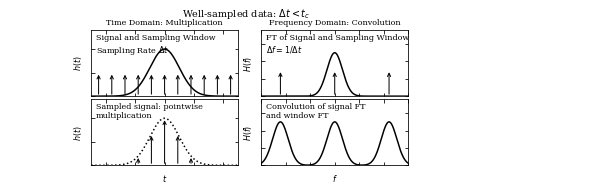

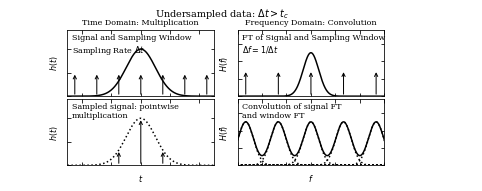

In [16]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


def gaussian(x, a=1.0):
    return np.exp(-0.5 * (x / a) ** 2)


def gaussian_FT(f, a=1.0):
    return np.sqrt(2 * np.pi * a ** 2) * np.exp(-2 * (np.pi * a * f) ** 2)

#------------------------------------------------------------
# Define our terms
a = 1.0
t = np.linspace(-5, 5, 1000)
h = gaussian(t, a)

f = np.linspace(-2, 2, 1000)
H = gaussian_FT(f, a)


#------------------------------------------------------------
# Two plots: one well-sampled, one over-sampled
N = 12

for dt in (0.9, 1.5):
    # define time-space sampling
    t_sample = dt * (np.arange(N) - N / 2)
    h_sample = gaussian(t_sample, a)

    # Fourier transform of time-space sampling
    df = 1. / dt
    f_sample = df * (np.arange(N) - N / 2)

    # Plot the results
    fig = plt.figure(figsize=(5, 2.5))
    fig.subplots_adjust(left=0.07, right=0.95, wspace=0.16,
                        bottom=0.1, top=0.85, hspace=0.05)

    # First plot: sampled time-series
    ax = fig.add_subplot(221)
    ax.plot(t, h, '-k')

    for ts in t_sample:
        ax.annotate('', (ts, 0.5), (ts, 0), ha='center', va='center',
                    arrowprops=dict(arrowstyle='->'))
    ax.text(0.03, 0.95,
            ("Signal and Sampling Window\n" +
             r"Sampling Rate $\Delta t$"),
            ha='left', va='top', transform=ax.transAxes)
    ax.set_ylabel('$h(t)$')
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 1.4)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_title('Time Domain: Multiplication')

    # second plot: frequency space
    ax = fig.add_subplot(222)
    ax.plot(f, H, '-k')
    for fs in f_sample:
        ax.annotate('', (fs, 1.5), (fs, 0), ha='center', va='center',
                    arrowprops=dict(arrowstyle='->'))
    ax.text(0.03, 0.95,
            ("FT of Signal and Sampling Window\n" +
             r"$\Delta f = 1 / \Delta t$"),
            ha='left', va='top', transform=ax.transAxes)
    ax.set_ylabel('$H(f)$')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(0, 3.8)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_title('Frequency Domain: Convolution')

    # third plot: windowed function
    ax = fig.add_subplot(223)
    for (ts, hs) in zip(t_sample, h_sample):
        if hs < 0.1:
            continue
        ax.annotate('', (ts, hs), (ts, 0), ha='center', va='center',
                    arrowprops=dict(arrowstyle='->'))
    ax.plot(t, h, ':k')
    ax.text(0.03, 0.95, "Sampled signal: pointwise\nmultiplication",
            ha='left', va='top', transform=ax.transAxes)
    ax.set_xlabel('$t$')
    ax.set_ylabel('$h(t)$')
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 1.4)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    # fourth plot: convolved PSD
    ax = fig.add_subplot(224)
    window = np.array([gaussian_FT(f - fs, a) for fs in f_sample])
    ax.plot(f, window.sum(0), '-k')
    if dt > 1:
        ax.plot(f, window.T, ':k')
    ax.text(0.03, 0.95, "Convolution of signal FT\nand window FT",
            ha='left', va='top', transform=ax.transAxes)
    ax.set_xlabel('$f$')
    ax.set_ylabel('$H(f)$')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(0, 3.8)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    if dt > 1:
        fig.suptitle(r"Undersampled data: $\Delta t > t_c$")
    else:
        fig.suptitle(r"Well-sampled data: $\Delta t < t_c$")

plt.show()

## The window function 
Previus figure shows the relationship between sampling and the window function: the
sampling window function in the time domain can be expressed as the sum of delta functions placed at sampled observation times. In this case the observations are regularly spaced. The Fourier transform of a set of delta functions with spacing $\Delta t$ is another set of delta functions with spacing $1/\Delta t$; this result is at the core of the
Nyquist sampling theorem. By the convolution theorem, pointwise multiplication of this sampling window with the data is equivalent to the convolution of their Fourier
representations, as seen in the right-hand panels.

When data are nonuniformly sampled, the impact of sampling can be under-
stood using the same framework. The sampling window is the sum of delta functions, but because the delta functions are not regularly spaced, the Fourier transform is a
more complicated, and in general complex, function of f . The PSD can be computed using the discrete Fourier transform by constructing a fine grid of times and setting
the window function to one at the sampled times and zero otherwise. The resulting PSD is called the spectral window function, and models how the Fourier-space signal
is affected by the sampling. T the observed PSD is a convolution of the true underlying PSD and this spectral window function.

An example of an irregular sampling window is shown in next figure: here
the true Fourier transform of the sinusoidal data is a localized spike. The Fourier transform of the function viewed through the sampling window is a convolution of the true FT and the FT of the window function. This type of analysis of the spectral window function can be a convenient way to summarize the sampling properties of
a given data set, and can be used to understand aliasing properties as well.



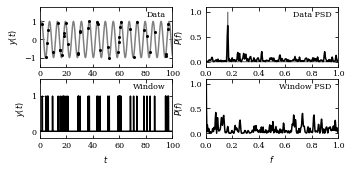

In [17]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate the data
Nbins = 2 ** 15
Nobs = 40
f = lambda t: np.sin(np.pi * t / 3)

t = np.linspace(-100, 200, Nbins)
dt = t[1] - t[0]
y = f(t)

# select observations
np.random.seed(42)
t_obs = 100 * np.random.random(40)

D = abs(t_obs[:, np.newaxis] - t)
i = np.argmin(D, 1)

t_obs = t[i]
y_obs = y[i]
window = np.zeros(Nbins)
window[i] = 1

#------------------------------------------------------------
# Compute PSDs
Nfreq = int(Nbins / 2)

dt = t[1] - t[0]
df = 1. / (Nbins * dt)
f = df * np.arange(Nfreq)

PSD_window = abs(np.fft.fft(window)[:Nfreq]) ** 2
PSD_y = abs(np.fft.fft(y)[:Nfreq]) ** 2
PSD_obs = abs(np.fft.fft(y * window)[:Nfreq]) ** 2

# normalize the true PSD so it can be shown in the plot:
# in theory it's a delta function, so normalization is
# arbitrary

# scale PSDs for plotting
PSD_window /= 500
PSD_y /= PSD_y.max()
PSD_obs /= 500

#------------------------------------------------------------
# Prepare the figures
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, hspace=0.2, wspace=0.25,
                    left=0.12, right=0.95)

# First panel: data vs time
ax = fig.add_subplot(221)
ax.plot(t, y, '-', c='gray')
ax.plot(t_obs, y_obs, '.k', ms=4)
ax.text(0.95, 0.93, "Data", ha='right', va='top', transform=ax.transAxes)
ax.set_ylabel('$y(t)$')
ax.set_xlim(0, 100)
ax.set_ylim(-1.5, 1.8)

# Second panel: PSD of data
ax = fig.add_subplot(222)
ax.fill(f, PSD_y, fc='gray', ec='gray')
ax.plot(f, PSD_obs, '-', c='black')
ax.text(0.95, 0.93, "Data PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_ylabel('$P(f)$')
ax.set_xlim(0, 1.0)
ax.set_ylim(-0.1, 1.1)

# Third panel: window vs time
ax = fig.add_subplot(223)
ax.plot(t, window, '-', c='black')
ax.text(0.95, 0.93, "Window", ha='right', va='top', transform=ax.transAxes)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')
ax.set_xlim(0, 100)
ax.set_ylim(-0.2, 1.5)

# Fourth panel: PSD of window
ax = fig.add_subplot(224)
ax.plot(f, PSD_window, '-', c='black')
ax.text(0.95, 0.93, "Window PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_xlabel('$f$')
ax.set_ylabel('$P(f)$')
ax.set_xlim(0, 1.0)
ax.set_ylim(-0.1, 1.1)

plt.show()

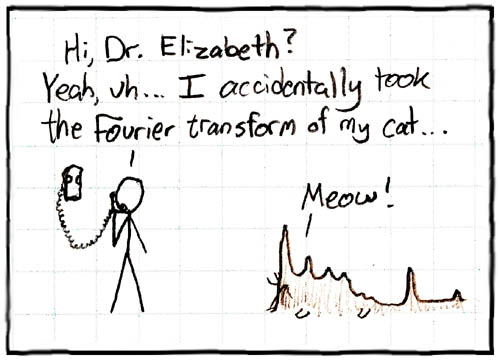

https://youtu.be/aVhMVwwUwUE

## The fast Fourier transform
The Fast Fourier transform (FFT) is an algorithm for computing discrete Fourier transforms in $O(N log N)$ time, rather than $O(N^2)$ using a naive implementation.

The algorithmic details for the FFT can be found in NumRec. The speed of FFT makes it a widespread tool in the analysis of evenly sampled, high signal-to-noise ratio, time series data. The FFT and various related tools are available in Python through the submodules:
numpy.fft and scipy.fftpack.

An example of such analysis is shown in next figure  for a function with a single dominant frequency: a sine wave whose amplitude is modulated by a Gaussian. The figure shows the results in the presence of noise, for two different noise levels. For
the high noise level, the periodic signal is hard to recognize in the time domain.

Nevertheless, the dominant frequency is easily discernible in the bottom panel for both noise realizations. One curious property is that the expected value of the peak
heights are the same for both noise realizations. Another curious feature of the discrete PSD  is that its precision as an estimator of the PSD does not depend on the number of data values, N (i.e., the discrete PSD is an inconsistent estimator of the true PSD). For example, if N is doubled by doubling the data-taking interval T , then the resulting discrete PSD is defined at twice as many frequencies, but the value of PSD at a given frequency does not change. Alternatively, if N is doubled by doubling the sampling rate such that $t → t/2$, then the Nyquist frequency increases by a factor of 2 to accommodate twice as many points, again without a change in PSD at a given frequency. 




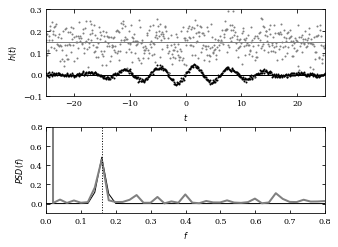

In [18]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from scipy.fftpack import fft
from scipy.stats import norm

from astroML.fourier import PSD_continuous

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Draw the data
np.random.seed(1)

tj = np.linspace(-25, 25, 512)
hj = np.sin(tj)
hj *= norm(0, 10).pdf(tj)

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(hspace=0.35)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

offsets = (0, 0.15)
colors = ('black', 'gray')
linewidths = (1, 2)
errors = (0.005, 0.05)

for (offset, color, error, linewidth) in zip(offsets, colors,
                                             errors, linewidths):
    # compute the PSD
    err = np.random.normal(0, error, size=hj.shape)
    hj_N = hj + err + offset
    fk, PSD = PSD_continuous(tj, hj_N)

    # plot the data and PSD
    ax1.scatter(tj, hj_N, s=4, c=color, lw=0)
    ax1.plot(tj, 0 * tj + offset, '-', c=color, lw=1)
    ax2.plot(fk, PSD, '-', c=color, lw=linewidth)

# vertical line marking the expected peak location
ax2.plot([0.5 / np.pi, 0.5 / np.pi], [-0.1, 1], ':k', lw=1)

ax1.set_xlim(-25, 25)
ax1.set_ylim(-0.1, 0.3001)

ax1.set_xlabel('$t$')
ax1.set_ylabel('$h(t)$')

ax1.yaxis.set_major_locator(plt.MultipleLocator(0.1))

ax2.set_xlim(0, 0.8)
ax2.set_ylim(-0.101, 0.801)

ax2.set_xlabel('$f$')
ax2.set_ylabel('$PSD(f)$')

plt.show()

The discrete Fourier transform can be a powerful tool even when data are not periodic. A good example is estimating power spectrum for noise that is not white.

In next figure we compute the noise power spectrum for a stream of time series data from LIGO. The measurement noise is far from white: it has a minimum at frequencies of a few hundred hertz (the minimum level is related to the number of photons traveling through the interferometers), and increases rapidly at smaller
frequencies due to seismic effects, and at higher frequencies due to a number of instrumental effects. The predicted signal strengths are at best a few times stronger than the noise level and thus precise noise characterization is a prerequisite for robust detection of gravitational waves.

For noisy data with many samples, more sophisticated FFT-based methods can be used to improve the signal-to-noise ratio of the resulting PSD, at the expense
of frequency resolution. One well-known method is Welch’s method, which computes multiple Fourier transforms over overlapping windows of the data to smooth noise effects in the resulting spectrum; we used this method and two window functions (top-hat and the Hanning, or cosine window) to compute PSDs shown
in next figure. The Hanning window suppresses noise and better picks up features at high frequencies, at the expense of affecting the shape of the continuum (note that computations are done in linear frequency space, while the figure shows a logarithmic frequency axis).

For more information see: https://pycbc.org/

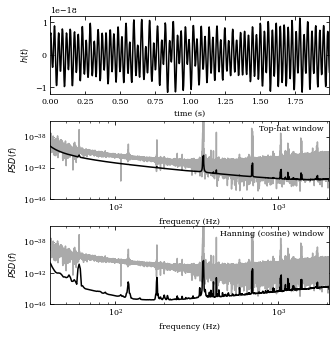

In [19]:
"""
Plot the power spectrum of LIGO data
------------------------------------
Figure 10.6

LIGO data and its noise power spectrum. The upper panel shows a 2-second-long
stretch of data (~8000 points; essentially noise without signal) from LIGO
Hanford. The middle and bottom panels show the power spectral density computed
for 2048 seconds of data, sampled at 4096 Hz (~8 million data values). The gray
line shows the PSD computed using a naive FFT approach; the dark line uses
Welch's method of overlapping windows to smooth noise; the middle panel uses a
1-second-wide top-hat window and the bottom panel the so-called Hanning
(cosine) window with the same width.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack
from matplotlib import mlab

from astroML.datasets import fetch_LIGO_large

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Fetch the LIGO hanford data
data, dt = fetch_LIGO_large()

# subset of the data to plot
t0 = 646
T = 2
tplot = dt * np.arange(T * 4096)
dplot = data[4096 * t0: 4096 * (t0 + T)]

tplot = tplot[::10]
dplot = dplot[::10]

fmin = 40
fmax = 2060

#------------------------------------------------------------
# compute PSD using simple FFT
N = len(data)
df = 1. / (N * dt)
PSD = abs(dt * fftpack.fft(data)[:N // 2]) ** 2
f = df * np.arange(N / 2)

cutoff = ((f >= fmin) & (f <= fmax))
f = f[cutoff]
PSD = PSD[cutoff]
f = f[::100]
PSD = PSD[::100]

#------------------------------------------------------------
# compute PSD using Welch's method -- no window function
PSDW1, fW1 = mlab.psd(data, NFFT=4096, Fs=1. / dt,
                      window=mlab.window_none, noverlap=2048)

dfW1 = fW1[1] - fW1[0]

cutoff = (fW1 >= fmin) & (fW1 <= fmax)
fW1 = fW1[cutoff]
PSDW1 = PSDW1[cutoff]

#------------------------------------------------------------
# compute PSD using Welch's method -- hanning window function
PSDW2, fW2 = mlab.psd(data, NFFT=4096, Fs=1. / dt,
                      window=mlab.window_hanning, noverlap=2048)

dfW2 = fW2[1] - fW2[0]

cutoff = (fW2 >= fmin) & (fW2 <= fmax)
fW2 = fW2[cutoff]
PSDW2 = PSDW2[cutoff]

#------------------------------------------------------------
# Plot the data
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(bottom=0.1, top=0.9, hspace=0.35)

# top panel: time series
ax = fig.add_subplot(311)
ax.plot(tplot, dplot, '-k')
ax.set_xlabel('time (s)')
ax.set_ylabel('$h(t)$')

ax.set_ylim(-1.2E-18, 1.2E-18)

# middle panel: non-windowed filter
ax = fig.add_subplot(312)
ax.loglog(f, PSD, '-', c='#AAAAAA')
ax.loglog(fW1, PSDW1, '-k')
ax.text(0.98, 0.95, "Top-hat window",
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlabel('frequency (Hz)')
ax.set_ylabel(r'$PSD(f)$')

ax.set_xlim(40, 2060)
ax.set_ylim(1E-46, 1E-36)
ax.yaxis.set_major_locator(plt.LogLocator(base=100))

# bottom panel: hanning window
ax = fig.add_subplot(313)
ax.loglog(f, PSD, '-', c='#AAAAAA')
ax.loglog(fW2, PSDW2, '-k')
ax.text(0.98, 0.95, "Hanning (cosine) window",
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlabel('frequency (Hz)')
ax.set_ylabel(r'$PSD(f)$')

ax.set_xlim(40, 2060)
ax.set_ylim(1E-46, 1E-36)
ax.yaxis.set_major_locator(plt.LogLocator(base=100))

plt.show()

## Wavelets
The trigonometric basis functions used in the Fourier transform have an infinite extent and for this reason the Fourier transform may not be the best method to analyze nonperiodic time series data, such as the case of a localized event (e.g., a burst that decays over some timescale so that the PSD is also varying with time). Although
we can evaluate the PSD for finite stretches of time series and thus hope to detect its eventual changes, this approach (called spectrogram, or dynamical power spectra
analysis) suffers from degraded spectral resolution and is sensitive to the specific choice of time series segmentation length. With basis functions that are localized
themselves, this downside of the Fourier transform can be avoided and the ability to identify signal, filter, or compress data significantly improved.

An increasingly popular family of basis functions is called wavelets. A good introduction is available in NumRec 3. By construction, wavelets are localized in both frequency and time domains. Individual wavelets are specified by a set of wavelet
filter coefficients. Given a wavelet, a complete orthonormal set of basis functions can be constructed by scalings and translations. Different wavelet families trade the localization of a wavelet with its smoothness. For example, in the frequently used
Daubechies wavelets, members of a family range from highly localized to highly smooth. Other popular wavelets include “Mexican hat” and Haar wavelets. 

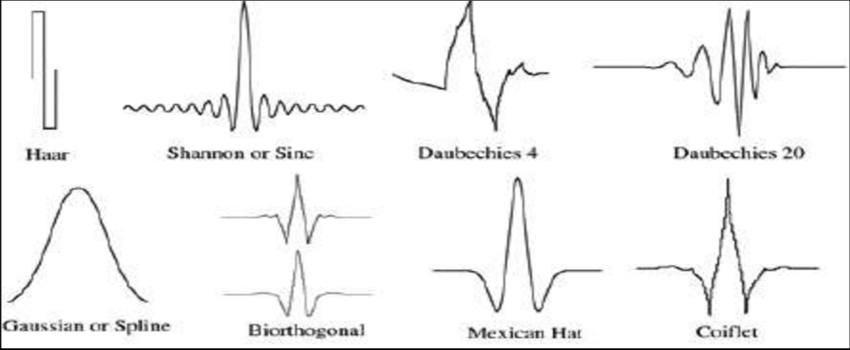


A famous application of wavelet-based compression is the FBI’s 200 TB database, containing 30 million fingerprints.
The discrete wavelet transform (DWT) can be used to analyze the power spectrum of a time series as a function of time. While similar analysis could be performed using the Fourier transform evaluated in short sliding windows, the DWT
is superior. If a time series contains a localized event in time and frequency, DWT
may be used to discover the event and characterize its power spectrum. A toolkit
with wavelet analysis implemented in Python, PyWavelets, is publicly available: https://pywavelets.readthedocs.io/en/latest/

A well-written guide to the use of wavelet transforms in practice can be found in http://www.wavelet.org/  and https://paos.colorado.edu/research/wavelets/bams_79_01_0061.pdf


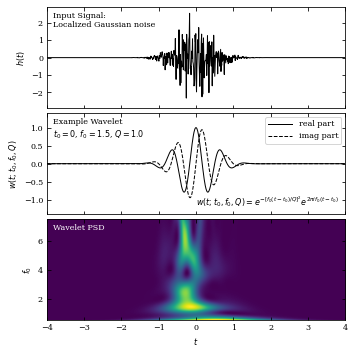

In [20]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.fourier import\
    FT_continuous, IFT_continuous, sinegauss, sinegauss_FT, wavelet_PSD

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Sample the function: localized noise
np.random.seed(0)

N = 1024
t = np.linspace(-5, 5, N)
x = np.ones(len(t))

h = np.random.normal(0, 1, len(t))
h *= np.exp(-0.5 * (t / 0.5) ** 2)

#------------------------------------------------------------
# Compute an example wavelet
W = sinegauss(t, 0, 1.5, Q=1.0)

#------------------------------------------------------------
# Compute the wavelet PSD
f0 = np.linspace(0.5, 7.5, 100)
wPSD = wavelet_PSD(t, h, f0, Q=1.0)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.05, left=0.12, right=0.95, bottom=0.08, top=0.95)

# First panel: the signal
ax = fig.add_subplot(311)
ax.plot(t, h, '-k', lw=1)
ax.text(0.02, 0.95, ("Input Signal:\n"
                     "Localized Gaussian noise"),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlim(-4, 4)
ax.set_ylim(-2.9, 2.9)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('$h(t)$')

# Second panel: an example wavelet
ax = fig.add_subplot(312)
ax.plot(t, W.real, '-k', label='real part', lw=1)
ax.plot(t, W.imag, '--k', label='imag part', lw=1)

ax.text(0.02, 0.95, ("Example Wavelet\n"
                     "$t_0 = 0$, $f_0=1.5$, $Q=1.0$"),
        ha='left', va='top', transform=ax.transAxes)
ax.text(0.98, 0.05,
        (r"$w(t; t_0, f_0, Q) = e^{-[f_0 (t - t_0) / Q]^2}"
         "e^{2 \pi i f_0 (t - t_0)}$"),
        ha='right', va='bottom', transform=ax.transAxes)

ax.legend(loc=1)

ax.set_xlim(-4, 4)
ax.set_ylim(-1.4, 1.4)
ax.set_ylabel('$w(t; t_0, f_0, Q)$')
ax.xaxis.set_major_formatter(plt.NullFormatter())

# Third panel: the spectrogram
ax = plt.subplot(313)
ax.imshow(wPSD, origin='lower', aspect='auto',
          extent=[t[0], t[-1], f0[0], f0[-1]])

ax.text(0.02, 0.95, ("Wavelet PSD"), color='w',
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlim(-4, 4)
ax.set_ylim(0.5, 7.5)

ax.set_xlabel('$t$')
ax.set_ylabel('$f_0$')

plt.show()

## Matched Filters:

Consider a signal x(t) paased trougth a linear filter with impulse f(t). The frecuency domain response of the output Y(w) will be the product of the Fourier transforms of the input and the filter:

$$Y(w)=X(w)F(w)$$

and the time domain response will be the convolution:

$$y(t)=x(t) \star f(t)=\int_{0}^{T} x(t-u)f(u)du$$

where the bounds of the integral are the interval during wich the signal has been applied to the filter. The amgnitude of the output can be bounded by the Schwarz's inequality:

$$y^2(t)=|\int_{0}^{T} x(t-u)f(u)du|^2 \leq \int_{0}^{T} |x(t-u)|^2 du \int_{0}^{T} |f(u)|^2 du$$

By inspection, this bound will be saturated (reach its maximun value)
if $f(u)=Ax^{*}(t-u)$ for any constant A. The filter will produce maximun output for a given input signal if the impulse response of the filter is proportional to the complex conjugate of the signal reversed in time. This is called a matched filter, and is used routinely to detect and time known signals. 

For example, to measure the arrival time of radar echoes, the output from a matched filter to the transmitted pulses goes to a comparator, and the time when the output exceeds a preset treshold is used to determine when a pulse has arrived.

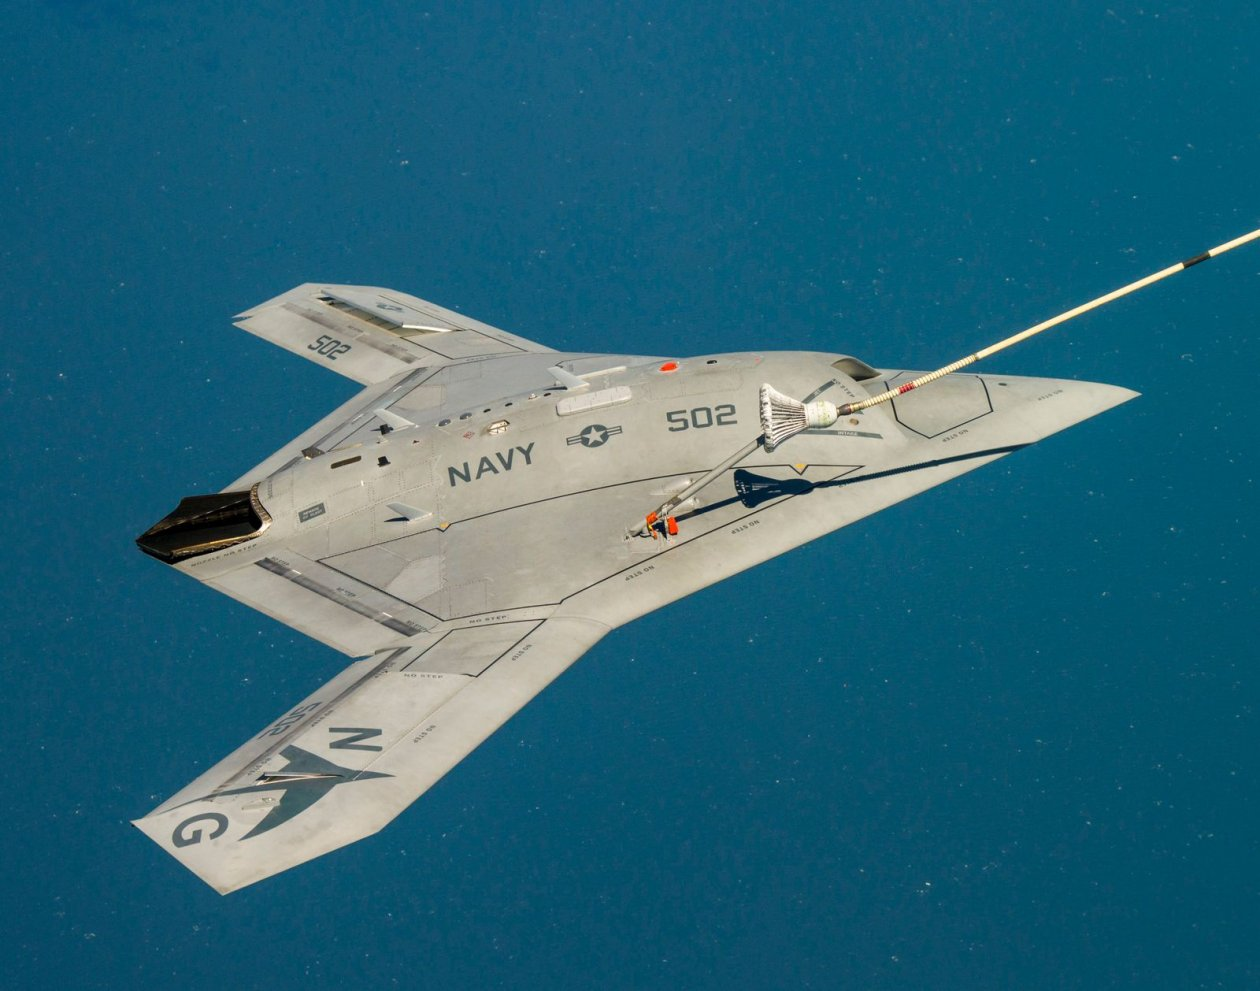

See https://arxiv.org/abs/1804.08627 and https://arxiv.org/abs/astro-ph/9803125







## Digital Filtering
Digital filtering aims to reduce noise in time series data, or to compress data. Common examples include low-pass filtering, where high requencies are suppressed, high-pass filtering, where low frequencies are
suppressed, passband filtering, where only a finite range of frequencies is admitted,
and a notch filter, where a finite range of frequencies is blocked. Fourier analysis is
one of the most useful tools for performing filtering. We will use a few examples to
illustrate the most common applications of filtering. Numerous other techniques can
be found in signal processing literature, including approaches based on the wavelets
discussed above.
We emphasize that filtering always decreases the information content of data
(despite making it appear less noisy). As we have already learned throughout
previous chapters, when model parameters are estimated from data, raw (unfiltered)
data should be used. In some sense, this is an analogous situation to binning data to produce a histogram—while very useful for visualization, estimates of model
parameters can become biased if one is not careful. This connection will be made explicit below for the Wiener filter, where we show its equivalence to kernel density
estimation (§6.1.1), the generalization of histogram binning.

### Low-pass filters
The power spectrum for common Gaussian noise is flat and will extend to frequencies as high as the Nyquist limit, $f_N = 1/(2\Delta t)$. If the data are band limited to a lower frequency, $f_c < f_N$ , then they can be smoothed without much impact by suppressing frequencies $| f | > f_c$. Given a filter in frequency space, $\phi( f )$, we can obtain a smoothed version of data by taking the inverse Fourier transform of

$$\hat{Y}(f)=Y( f ) \phi( f )$$

where $Y( f )$ is the discrete Fourier transform of data. At least in principle, we could simply set $\phi( f )$ to zero for $| f | > f_c$ , but this approach would result in ringing (i.e.,
unwanted oscillations) in the signal. Instead, the optimal filter for this purpose is
constructed by minimizing the MISE between $\hat{Y}( f )$ and $Y( f )$ (for detailed derivation see NumRec) and is called the Wiener filter:

$$\phi(f)=\frac{P_S ( f )}{P_S ( f )+P_N ( f )}$$

Here $P_S ( f )$ and $P_N ( f )$ represent components of a two-component (signal and noise)
fit to the PSD of input data, $PSD_Y ( f ) = P_S ( f ) + P_N ( f )$, which holds as long as the
signal and noise are uncorrelated. Given some assumed form of signal and noise, these terms can be determined from a fit to the observed PSD, as illustrated by the
example shown in next figure.

 Even when the fidelity of the PSD fit is not high, the resulting filter performs well in practice (the key features are that ( f ) ∼ 1 at small frequencies and that it drops to zero at high frequencies for a band-limited signal).




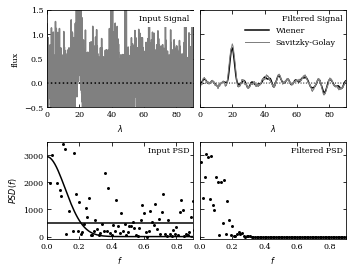

In [21]:
"""
Wiener Filter Example
---------------------
Figure 10.10

An example of data filtering using a Wiener filter. The upper-left panel shows
noisy input data (200 evenly spaced points) with a narrow Gaussian peak
centered at x = 20. The bottom panels show the input (left) and Wiener-filtered
(right) power spectral density (PSD) distributions. The two curves in the
bottom-left panel represent two-component fit to PSD given by eq. 10.20. The
upper-right panel shows the result of the Wiener filtering on the input: the
Gaussian peak is clearly seen. For comparison, we also plot the result of a
fourth-order Savitzky-Golay filter with a window size of lambda = 10.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from scipy import optimize, fftpack
from astroML.filters import savitzky_golay, wiener_filter

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Create the noisy data
np.random.seed(5)
N = 2000
dt = 0.05

t = dt * np.arange(N)
h = np.exp(-0.5 * ((t - 20.) / 1.0) ** 2)
hN = h + np.random.normal(0, 0.5, size=h.shape)

Df = 1. / N / dt
f = fftpack.ifftshift(Df * (np.arange(N) - N / 2))
HN = fftpack.fft(hN)

#------------------------------------------------------------
# Set up the Wiener filter:
#  fit a model to the PSD consisting of the sum of a
#  gaussian and white noise
h_smooth, PSD, P_S, P_N, Phi = wiener_filter(t, hN, return_PSDs=True)

#------------------------------------------------------------
# Use the Savitzky-Golay filter to filter the values
h_sg = savitzky_golay(hN, window_size=201, order=4, use_fft=False)

#------------------------------------------------------------
# Plot the results
N = len(t)
Df = 1. / N / (t[1] - t[0])
f = fftpack.ifftshift(Df * (np.arange(N) - N / 2))
HN = fftpack.fft(hN)

fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(wspace=0.05, hspace=0.35,
                    bottom=0.1, top=0.95,
                    left=0.12, right=0.95)

# First plot: noisy signal
ax = fig.add_subplot(221)
ax.plot(t, hN, '-', c='gray')
ax.plot(t, np.zeros_like(t), ':k')
ax.text(0.98, 0.95, "Input Signal", ha='right', va='top',
        transform=ax.transAxes, bbox=dict(fc='w', ec='none'))

ax.set_xlim(0, 90)
ax.set_ylim(-0.5, 1.5)

ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('flux')

# Second plot: filtered signal
ax = plt.subplot(222)
ax.plot(t, np.zeros_like(t), ':k', lw=1)
ax.plot(t, h_smooth, '-k', lw=1.5, label='Wiener')
ax.plot(t, h_sg, '-', c='gray', lw=1, label='Savitzky-Golay')

ax.text(0.98, 0.95, "Filtered Signal", ha='right', va='top',
        transform=ax.transAxes)
ax.legend(loc='upper right', bbox_to_anchor=(0.98, 0.9), frameon=False)

ax.set_xlim(0, 90)
ax.set_ylim(-0.5, 1.5)

ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_locator(plt.MultipleLocator(20))
ax.set_xlabel(r'$\lambda$')

# Third plot: Input PSD
ax = fig.add_subplot(223)
ax.scatter(f[:N // 2], PSD[:N // 2], s=9, c='k', lw=0)
ax.plot(f[:N // 2], P_S[:N // 2], '-k')
ax.plot(f[:N // 2], P_N[:N // 2], '-k')

ax.text(0.98, 0.95, "Input PSD", ha='right', va='top',
        transform=ax.transAxes)

ax.set_ylim(-100, 3500)
ax.set_xlim(0, 0.9)

ax.yaxis.set_major_locator(plt.MultipleLocator(1000))
ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.set_xlabel('$f$')
ax.set_ylabel('$PSD(f)$')

# Fourth plot: Filtered PSD
ax = fig.add_subplot(224)
filtered_PSD = (Phi * abs(HN)) ** 2
ax.scatter(f[:N // 2], filtered_PSD[:N // 2], s=9, c='k', lw=0)

ax.text(0.98, 0.95, "Filtered PSD", ha='right', va='top',
        transform=ax.transAxes)

ax.set_ylim(-100, 3500)
ax.set_xlim(0, 0.9)

ax.yaxis.set_major_locator(plt.MultipleLocator(1000))
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.set_xlabel('$f$')

plt.show()

There is an interesting connection between the kernel density estimation
method discussed and Wiener filtering. By the convolution theorem, the Wiener-filtered result is equivalent to the convolution of the unfiltered signal with
the inverse Fourier transform of $\phi( f )$: this is the kernel shown in next figure.
This convolution is equivalent to kernel density estimation. When Wiener filtering is viewed in this way, it effectively says that we believe the signal is as wide as the
central peak shown, and the statistics of the noise are such that
the minor peaks in the wings work to cancel out noise in the major peak. 

Hence, the modeling of the PSD in the frequency domain corresponds to
choosing the optimal kernel width. Just as detailed modeling of the Wiener filter is not of paramount importance, the choice of kernel is not either.

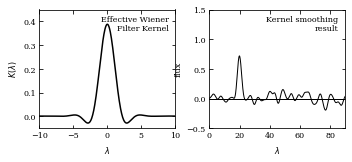

In [22]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from scipy import optimize, fftpack, interpolate
from astroML.fourier import IFT_continuous
from astroML.filters import wiener_filter

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#----------------------------------------------------------------------
# sample the same data as the previous Wiener filter figure
np.random.seed(5)
t = np.linspace(0, 100, 2001)[:-1]
h = np.exp(-0.5 * ((t - 20.) / 1.0) ** 2)
hN = h + np.random.normal(0, 0.5, size=h.shape)

#----------------------------------------------------------------------
# compute the PSD
N = len(t)
Df = 1. / N / (t[1] - t[0])
f = fftpack.ifftshift(Df * (np.arange(N) - N / 2))

h_wiener, PSD, P_S, P_N, Phi = wiener_filter(t, hN, return_PSDs=True)

#------------------------------------------------------------
# inverse fourier transform Phi to find the effective kernel
t_plot, kernel = IFT_continuous(f, Phi)

#------------------------------------------------------------
# perform kernel smoothing on the data.  This is faster in frequency
# space (ie using the standard Wiener filter above) but we will do
# it in the slow & simple way here to demonstrate the equivalence
# explicitly
kernel_func = interpolate.interp1d(t_plot, kernel.real)

t_eval = np.linspace(0, 90, 1000)
t_KDE = t_eval[:, np.newaxis] - t
t_KDE[t_KDE < t_plot[0]] = t_plot[0]
t_KDE[t_KDE > t_plot[-1]] = t_plot[-1]
F = kernel_func(t_KDE)

h_smooth = np.dot(F, hN) / np.sum(F, 1)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.2))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                    bottom=0.15, top=0.9)

# First plot: the equivalent Kernel to the WF
ax = fig.add_subplot(121)
ax.plot(t_plot, kernel.real, '-k')
ax.text(0.95, 0.95, "Effective Wiener\nFilter Kernel",
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(-10, 10)
ax.set_ylim(-0.05, 0.45)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$K(\lambda)$')

# Second axes: Kernel smoothed results
ax = fig.add_subplot(122)
ax.plot(t_eval, h_smooth, '-k', lw=1)
ax.plot(t_eval, 0 * t_eval, '-k', lw=1)
ax.text(0.95, 0.95, "Kernel smoothing\nresult",
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, 90)
ax.set_ylim(-0.5, 1.5)

ax.set_xlabel('$\lambda$')
ax.set_ylabel('flux')

plt.show()

### High-pass filters
The most common example of high-pass filtering in astronomy is baseline estimation in spectral data. Unlike the case of low-pass filtering, here there is no universal filter recipe. Baseline estimation is usually the first step toward the estimation of model parameters (e.g., location, width, and strength of spectral lines). In such cases, the
best approach might be full modeling and marginalization of baseline parameters as nuisance parameters at the end of analysis.

A simple iterative technique for high-pass filtering, called minimum component filtering. These are the main steps:

1. Determine baseline: exclude or mask regions where signal is clearly evident
and fit a baseline model (e.g., a low-order polynomial) to the unmasked
regions.

2. Get FT for the signal: after subtracting the baseline fit in the unmasked regions
(i.e., a linear regression fit), apply the discrete Fourier transform.

3. Filter the signal: remove high frequencies using a low-pass filter (e.g., Wiener filter), and inverse Fourier transform the result.

4. Recombine the baseline and the filtered signal: add the baseline fit subtracted in step 2 to the result from step 3. This is the minimum component filtering
estimate of baseline.

A minimum component filter applied to the spectrum of a white dwarf from the Sloan Digital Sky Survey is shown in next figure.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


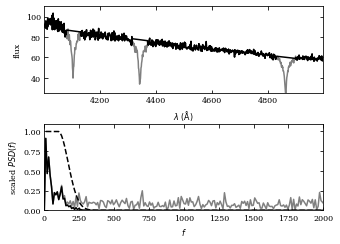

In [23]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from scipy import fftpack

from astroML.fourier import PSD_continuous
from astroML.datasets import fetch_sdss_spectrum

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Fetch the spectrum from SDSS database & pre-process
plate = 659
mjd = 52199
fiber = 381

data = fetch_sdss_spectrum(plate, mjd, fiber)

lam = data.wavelength()
spec = data.spectrum

# wavelengths are logorithmically spaced: we'll work in log(lam)
loglam = np.log10(lam)

flag = (lam > 4000) & (lam < 5000)
lam = lam[flag]
loglam = loglam[flag]
spec = spec[flag]

lam = lam[:-1]
loglam = loglam[:-1]
spec = spec[:-1]

#----------------------------------------------------------------------
# First step: mask-out significant features
feature_mask = (((lam > 4080) & (lam < 4130)) |
                ((lam > 4315) & (lam < 4370)) |
                ((lam > 4830) & (lam < 4900)))

#----------------------------------------------------------------------
# Second step: fit a line to the unmasked portion of the spectrum
XX = loglam[:, None] ** np.arange(2)
beta = np.linalg.lstsq(XX[~feature_mask], spec[~feature_mask])[0]

spec_fit = np.dot(XX, beta)
spec_patched = spec - spec_fit
spec_patched[feature_mask] = 0

#----------------------------------------------------------------------
# Third step: Fourier transform the patched spectrum
N = len(loglam)
df = 1. / N / (loglam[1] - loglam[0])
f = fftpack.ifftshift(df * (np.arange(N) - N / 2.))
spec_patched_FT = fftpack.fft(spec_patched)

#----------------------------------------------------------------------
# Fourth step: Low-pass filter on the transform
filt = np.exp(- (0.01 * (abs(f) - 100.)) ** 2)
filt[abs(f) < 100] = 1

spec_filt_FT = spec_patched_FT * filt

#----------------------------------------------------------------------
# Fifth step: inverse Fourier transform, and add back the fit
spec_filt = fftpack.ifft(spec_filt_FT)
spec_filt += spec_fit

#----------------------------------------------------------------------
# plot results
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(hspace=0.35)

ax = fig.add_subplot(211)
ax.plot(lam, spec, '-', c='gray')
ax.plot(lam, spec_patched + spec_fit, '-k')

ax.set_ylim(25, 110)

ax.set_xlabel(r'$\lambda\ {\rm(\AA)}$')
ax.set_ylabel('flux')

ax = fig.add_subplot(212)
factor = 15 * (loglam[1] - loglam[0])
ax.plot(fftpack.fftshift(f),
        factor * fftpack.fftshift(abs(spec_patched_FT) ** 1),
        '-', c='gray', label='masked/shifted spectrum')
ax.plot(fftpack.fftshift(f),
        factor * fftpack.fftshift(abs(spec_filt_FT) ** 1),
        '-k', label='filtered spectrum')
ax.plot(fftpack.fftshift(f),
        fftpack.fftshift(filt), '--k', label='filter')

ax.set_xlim(0, 2000)
ax.set_ylim(0, 1.1)

ax.set_xlabel('$f$')
ax.set_ylabel('scaled $PSD(f)$')

plt.show()

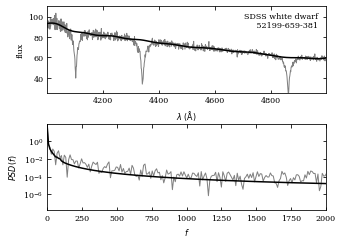

In [12]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.fourier import PSD_continuous
from astroML.datasets import fetch_sdss_spectrum
from astroML.filters import min_component_filter

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Fetch the spectrum from SDSS database & pre-process
plate = 659
mjd = 52199
fiber = 381

data = fetch_sdss_spectrum(plate, mjd, fiber)

lam = data.wavelength()
spec = data.spectrum

# wavelengths are logorithmically spaced: we'll work in log(lam)
loglam = np.log10(lam)

flag = (lam > 4000) & (lam < 5000)
lam = lam[flag]
loglam = loglam[flag]
spec = spec[flag]

lam = lam[:-1]
loglam = loglam[:-1]
spec = spec[:-1]

#----------------------------------------------------------------------
# Mask-out significant features and compute filtered version
feature_mask = (((lam > 4080) & (lam < 4130)) |
                ((lam > 4315) & (lam < 4370)) |
                ((lam > 4830) & (lam < 4900)))

spec_filtered = min_component_filter(loglam, spec, feature_mask, fcut=100)

#------------------------------------------------------------
# Compute PSD of filtered and unfiltered versions
f, spec_filt_PSD = PSD_continuous(loglam, spec_filtered)
f, spec_PSD = PSD_continuous(loglam, spec)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(hspace=0.35)

# Top panel: plot noisy and smoothed spectrum
ax = fig.add_subplot(211)
ax.plot(lam, spec, '-', c='gray', lw=1)
ax.plot(lam, spec_filtered, '-k')

ax.text(0.97, 0.93, "SDSS white dwarf\n %i-%i-%i" % (mjd, plate, fiber),
        ha='right', va='top', transform=ax.transAxes)

ax.set_ylim(25, 110)

ax.set_xlabel(r'$\lambda\ {\rm (\AA)}$')
ax.set_ylabel('flux')

# Bottom panel: plot noisy and smoothed PSD
ax = fig.add_subplot(212, yscale='log')
ax.plot(f, spec_PSD, '-', c='gray', lw=1)
ax.plot(f, spec_filt_PSD, '-k')

ax.set_xlabel(r'$f$')
ax.set_ylabel('$PSD(f)$')
ax.set_xlim(0, 2000)

plt.show()

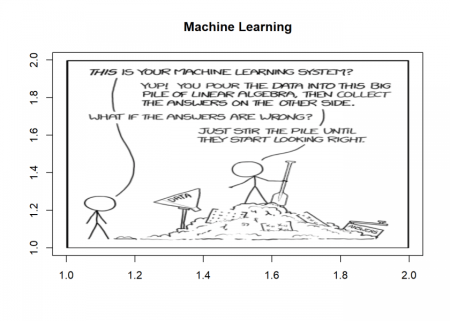

In [13]:
!pip install astroML